In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from pprint import pformat
import torch
from hloc.matchers import topicfm
from hloc import match_dense, matchers
from hloc.utils.base_model import dynamic_load

In [2]:
from third_party.TopicFM.src.utils.plotting import make_matching_figure, error_colormap
def draw_matches(mkpts0, mkpts1, img0, img1, conf, path=None):
    thr = 5e-4
    thr = 0.5
    color = error_colormap(conf, thr, alpha=0.1)
    text = [
        f"image name",
        f"#Matches: {len(mkpts0)}",
    ]
    if path:
        make_matching_figure(img0, img1, mkpts0, mkpts1, color, text=text, path=path, dpi=150)
    else:
        return make_matching_figure(img0, img1, mkpts0, mkpts1, color, text=text)

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Running on {device}')

Running on cpu


In [4]:
match_conf = match_dense.confs['topicfm']
Model = dynamic_load(matchers, match_conf['model']['name'])
model = Model(match_conf['model']).eval().to(device)

In [5]:
path_image0 = Path('datasets/sacre_coeur/mapping/71295362_4051449754.jpg')
path_image1 = Path('datasets/sacre_coeur/mapping/93341989_396310999.jpg')
pred = match_dense.match(model, path_image0, path_image1, match_conf['preprocessing'])

/home/codespace/.local/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


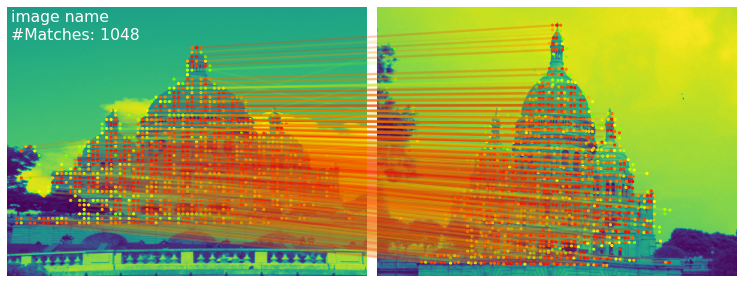

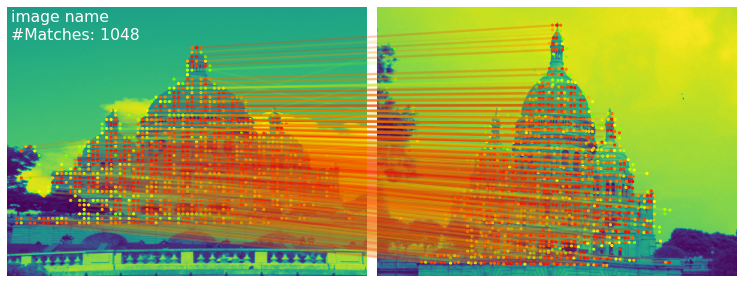

In [6]:
import numpy as np
mkpts0 = pred['keypoints0']
mkpts1 = pred['keypoints1']
img0 = pred['image0']
img1 = pred['image1']
if 'mconf' in pred.keys():
    mconf = pred['mconf']
else:
    mconf = np.ones(len(mkpts0))
path = './match.png'
draw_matches(mkpts0, mkpts1, img0, img1, mconf)